# Standard RB Demo

This is a very basic implemention of a standard RB experiment

*NOTE: the circuit generation code of this demo is quite slow*

In [1]:
import numpy as np
import qiskit_experiments as qe
rb = qe.randomized_benchmarking

# For simulation
from qiskit.test.mock import FakeParis
backend = FakeParis()

## Running 1-qubit RB

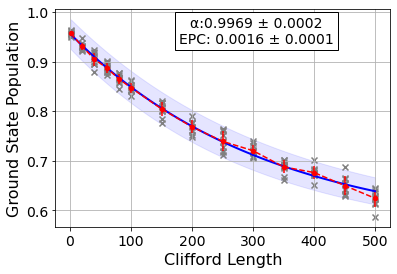

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: eeae9b24-4508-4021-9935-801d947c99e6
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.40223627 0.99687972 0.55437963]
- popt_err: [0.01470096 0.00020753 0.01527876]
- pcov: [[ 2.16118280e-04  2.91371673e-06 -2.23319907e-04]
 [ 2.91371673e-06  4.30692799e-08 -3.08448641e-06]
 [-2.23319907e-04 -3.08448641e-06  2.33440628e-04]]
- chisq: 1.92559889149833
- EPC: 0.001560138162073288
- EPC_err: 0.00010409048856184109
- plabels: ['A', 'alpha', 'B']

In [2]:
lengths = [1, 20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500]
num_samples = 10
seed = 1010

# Run an RB experiment on qubit 0
exp1 = rb.RBExperiment([0], lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend)

# View result data
expdata1

## Running 2-qubit RB

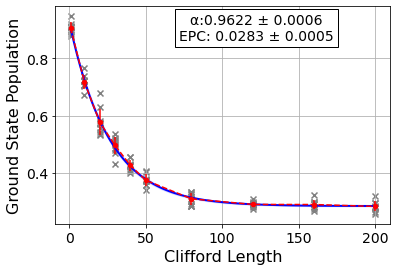

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: 1eae9123-b843-47bb-a9c8-ca5b020191d1
Status: COMPLETE
Circuits: 100
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.64521473 0.9622084  0.28420714]
- popt_err: [0.00460292 0.00062307 0.00181221]
- pcov: [[ 2.11869000e-05 -7.43394292e-07 -2.12967732e-06]
 [-7.43394292e-07  3.88215609e-07 -6.38446480e-07]
 [-2.12967732e-06 -6.38446480e-07  3.28409613e-06]]
- chisq: 0.3736216934383406
- EPC: 0.028343696252047496
- EPC_err: 0.00048565583793445976
- plabels: ['A', 'alpha', 'B']

In [3]:
lengths = [1, 10, 20, 30, 40, 50, 80, 120, 160, 200]
num_samples = 10
seed = 1010

# Run an RB experiment on qubits 0,
exp2 = rb.RBExperiment([0, 1], lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend)

# View result data
expdata2

## Running parallel RB experiments

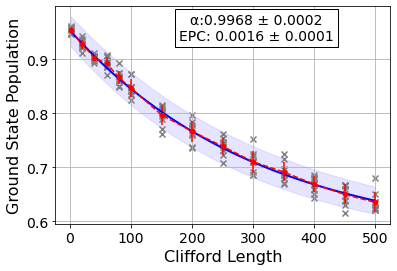

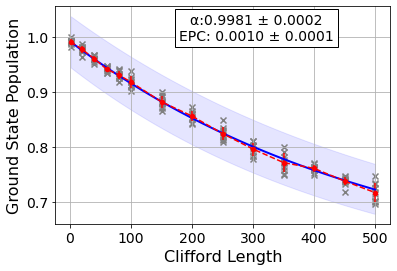

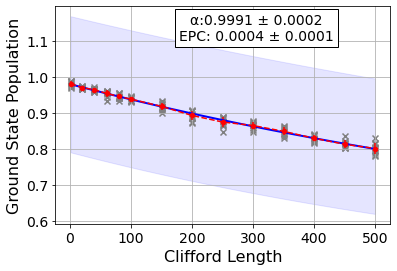

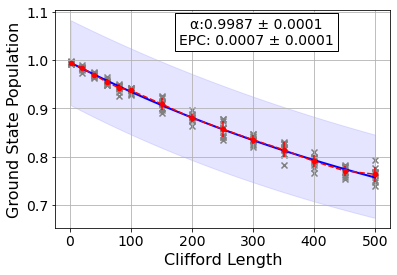

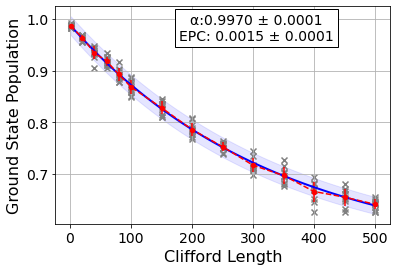

---------------------------------------------------
Experiment: ParallelExperiment
Experiment ID: 1c9a9000-afc2-4f5e-b2a4-56077952243e
Status: COMPLETE
Component Experiments: 5
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- experiment_types: ['RBExperiment', 'RBExperiment', 'RBExperiment', 'RBExperiment', 'RBExperiment']
- experiment_ids: ['013309a3-804c-4e0a-b57e-8e7d7a108f17', '148cf73f-7655-4837-8cb3-8578e6e85f6d', 'f78a9136-2a03-4ffb-9906-999573684611', '164de3a1-7679-4fe4-8ffd-fbfadda1a722', '7fc63e08-bd52-4ec1-a874-df343c0b6c68']
- experiment_qubits: [(0,), (1,), (2,), (3,), (4,)]

In [4]:
lengths = [1, 20, 40, 60, 80, 100, 150, 200, 250, 300, 350, 400, 450, 500]
num_samples = 10
seed1 = 1010

exps = [rb.RBExperiment([i], lengths, num_samples=num_samples, seed=seed + i)
        for i in range(5)]

par_exp = qe.composite.ParallelExperiment(exps)
par_expdata = par_exp.run(backend)

# View result
par_expdata

#### Viewing sub experiment data

The experiment data returned from a batched experiment also contains individual experiment data for each sub experiment which can be accessed using `experiment_data(index)`

In [5]:
# Print sub-experiment data
for i in range(par_exp.num_experiments):
    print(par_expdata.component_experiment_data(i), '\n')

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: 013309a3-804c-4e0a-b57e-8e7d7a108f17
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.39468756 0.99680414 0.5584573 ]
- popt_err: [0.01339491 0.000209   0.01414552]
- pcov: [[ 1.79423567e-04  2.65611873e-06 -1.88401686e-04]
 [ 2.65611873e-06  4.36806779e-08 -2.86349662e-06]
 [-1.88401686e-04 -2.86349662e-06  2.00095596e-04]]
- chisq: 1.363237248471715
- EPC: 0.0015979291513464888
- EPC_err: 0.00010483465143014874
- plabels: ['A', 'alpha', 'B'] 

---------------------------------------------------
Experiment: RBExperiment
Experiment ID: 148cf73f-7655-4837-8cb3-8578e6e85f6d
Status: COMPLETE
Circuits: 140
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- popt: [0.43421217 0.9980656  0.55758898]
- popt_err: [0.02288921 0.00015805 0.02361457]
- pcov: [[ 5.23915787e-04  3.